In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import h5py

## Metadata Preparation

In [2]:
birdmeta = pd.read_csv('train_extended.csv')
specieslist = ['amecro', 'amerob','bewwre','bkcchi','daejun','houfin','houspa','norfli','rewbla','sonspa','spotow','whcspa']

birdmeta = birdmeta[birdmeta['ebird_code'].isin(specieslist)]
birdmeta = birdmeta[birdmeta['secondary_labels']=='[]']
birdmeta = birdmeta[birdmeta['sampling_rate'].isin(['44100 (Hz)','48000 (Hz)'])]
birdmeta = birdmeta[birdmeta['rating']>=3.0]
birdmeta = birdmeta[birdmeta['duration']>=3.0]
birdmeta['fpath'] = 'dozenspecies/' + birdmeta['ebird_code'] + '/' + birdmeta['filename']

birdmeta.shape
birdmeta.head()

,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,xc_id,url,country,author,primary_label,longitude,time,recordist,license,fpath
166,5.0,no,amecro,2 (stereo),2020-07-12,44,XC575220.mp3,American Crow,XC575220 American Crow (Corvus brachyrhynchos),[],...,575220,https://www.xeno-canto.org/575220,United States,Michael Hurben,Corvus brachyrhynchos_American Crow,-93.37860,06:00,Michael Hurben,Creative Commons Attribution-NonCommercial-Sha...,dozenspecies/amecro/XC575220.mp3
169,5.0,no,amecro,2 (stereo),2020-06-17,41,XC569711.mp3,American Crow,XC569711 American Crow (Corvus brachyrhynchos ...,[],...,569711,https://www.xeno-canto.org/569711,United States,Russ Wigh,Corvus brachyrhynchos_American Crow,-81.05590,15:00,Russ Wigh,Creative Commons Attribution-NonCommercial-Sha...,dozenspecies/amecro/XC569711.mp3
171,5.0,no,amecro,1 (mono),2020-06-14,78,XC568365.mp3,American Crow,XC568365 American Crow (Corvus brachyrhynchos ...,[],...,568365,https://www.xeno-canto.org/568365,United States,Russ Wigh,Corvus brachyrhynchos_American Crow,-81.05590,07:00,Russ Wigh,Creative Commons Attribution-NonCommercial-Sha...,dozenspecies/amecro/XC568365.mp3
173,5.0,no,amecro,2 (stereo),0000-00-00,52,XC561291.mp3,American Crow,XC561291 American Crow (Corvus brachyrhynchos),[],...,561291,https://www.xeno-canto.org/561291,United States,Jim Berry,Corvus brachyrhynchos_American Crow,-79.23810,06:00,Jim Berry,Creative Commons Attribution-NonCommercial-Sha...,dozenspecies/amecro/XC561291.mp3
174,5.0,no,amecro,1 (mono),2019-04-18,13,XC556240.mp3,American Crow,XC556240 American Crow (Corvus brachyrhynchos),[],...,556240,https://www.xeno-canto.org/556240,United States,Caio Brito,Corvus brachyrhynchos_American Crow,-81.40509,18:35,Caio Brito,Creative Commons Attribution-NonCommercial-Sha...,dozenspecies/amecro/XC556240.mp3


## Spectrogram Example

In [3]:
birdmeta.groupby(['ebird_code']).count()

,rating,playback_used,channels,date,duration,filename,species,title,secondary_labels,bird_seen,...,xc_id,url,country,author,primary_label,longitude,time,recordist,license,fpath
ebird_code,,,,,,,,,,,,,,,,,,,,,
amecro,66,62,66,66,66,66,66,66,66,62,...,66,66,66,66,66,63,66,66,66,66
amerob,172,159,172,172,172,172,172,172,172,157,...,172,172,172,172,172,165,172,172,172,172
bewwre,144,135,144,144,144,144,144,144,144,128,...,144,144,144,144,144,144,144,144,144,144
bkcchi,45,38,45,45,45,45,45,45,45,38,...,45,45,45,45,45,44,45,45,45,45
daejun,125,121,125,125,125,125,125,125,125,119,...,125,125,125,125,125,123,125,125,125,125
houfin,84,78,84,84,84,84,84,84,84,81,...,84,84,84,84,84,84,84,84,84,84
houspa,630,577,630,630,630,630,630,630,630,589,...,630,630,630,630,630,625,630,630,630,630
norfli,37,34,37,37,37,37,37,37,37,33,...,37,37,37,37,37,37,37,37,37,37
rewbla,187,172,187,187,187,187,187,187,187,167,...,187,187,187,187,187,184,187,187,187,187


### Deciding the Spectrogram Qualities 

https://www.macaulaylibrary.org/2021/07/19/from-sound-to-images-part-1-a-deep-dive-on-spectrogram-creation/

"Following extensive testing, Sound ID was set to use a window length of 512 samples, with 128 samples for the STFT and an image size of 128 x 512 pixels."

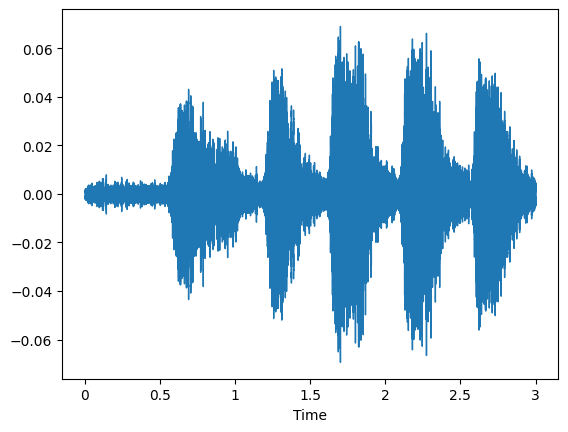

In [4]:
y, sr = librosa.load(birdmeta['fpath'].iloc[0], duration=4)
librosa.display.waveshow(y, sr=sr)

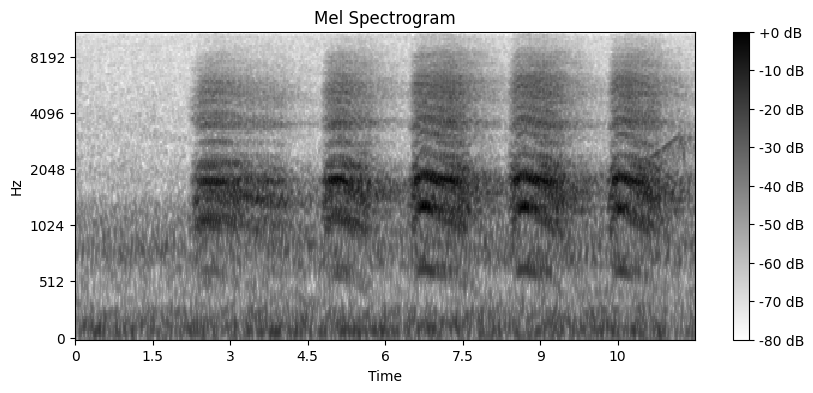

(128, 517)

In [10]:
y, sr = librosa.load(birdmeta['fpath'].iloc[0], duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
spec_db.shape

## Processing and Saving Spectrograms for all chosen files

In [6]:
# Instantiating the h5 file
hdfname = 'bird_spectrograms.hdf5'
f = h5py.File(hdfname, 'w')

for species in specieslist:
    speciesdf = birdmeta[birdmeta['ebird_code']==species]
    birdspecs = np.zeros((128, 517, speciesdf.shape[0]))
    i = 0
    for fname in speciesdf['fpath']:
        y, sr = librosa.load(fname, duration=3)
        spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
        spec_db = librosa.power_to_db(spec, ref=np.max)
        birdspecs[:,:,i] = spec_db
        # print(species, i, spec_db.shape)
        i+=1
    with h5py.File(hdfname, 'a') as f:
        f.create_dataset(species, data=birdspecs)
        print(species, 'saved')


amecro saved


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


amerob saved
bewwre saved
bkcchi saved
daejun saved
houfin saved


houspa saved


norfli saved


rewbla saved


sonspa saved
spotow saved
whcspa saved


In [7]:
f = h5py.File(hdfname, 'r')
spec = list(f.keys())
tcount = 0
for s in spec:
    dset = f[s]
    print(dset.shape)
    tcount+=dset.shape[2]

tcount

(128, 517, 66)
(128, 517, 172)
(128, 517, 144)
(128, 517, 45)
(128, 517, 125)
(128, 517, 84)
(128, 517, 630)
(128, 517, 37)
(128, 517, 187)
(128, 517, 263)
(128, 517, 137)
(128, 517, 91)


1981

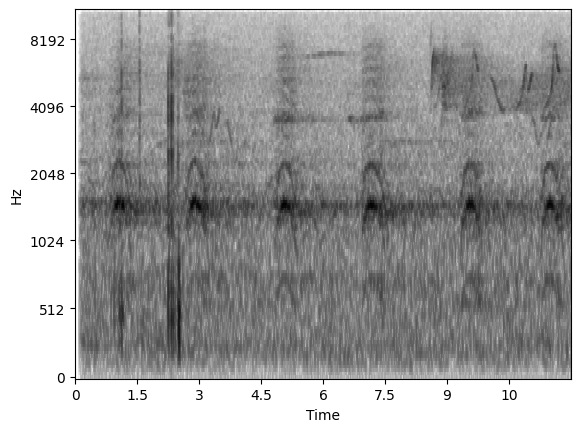

In [8]:
librosa.display.specshow(f['amecro'][:,:,10], x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')